Dataset loaded! Here are the first 5 rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  


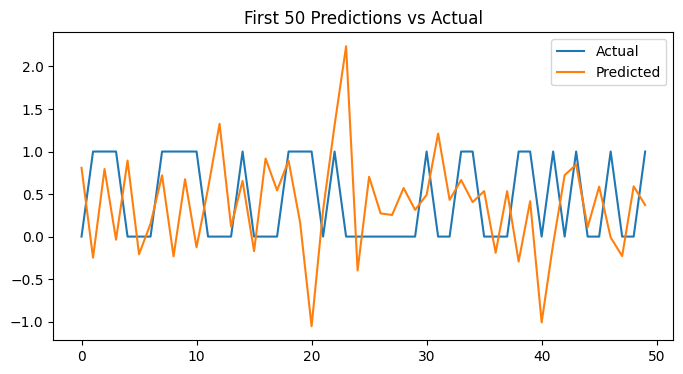

In [13]:
# ===============================
# Titanic - Linear & Neural Net
# ===============================

# Step 1: Install required packages
!pip install numpy pandas matplotlib torch scikit-learn -q

# Step 2: Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from sklearn.preprocessing import StandardScaler

# Step 3: Load Titanic dataset directly from URL
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

print("Dataset loaded! Here are the first 5 rows:")
print(df.head())

# Step 4: Prepare data (numeric columns only)
df = df.select_dtypes(include=['float64', 'int64']).dropna()
xs = df.drop('Survived', axis=1).values
ys = df['Survived'].values

scaler = StandardScaler()
xs = scaler.fit_transform(xs)

xs = torch.tensor(xs, dtype=torch.float)
ys = torch.tensor(ys, dtype=torch.float).reshape(-1, 1)

print(f"\nFeatures shape: {xs.shape}, Target shape: {ys.shape}")

# ===============================
# Step 5: Linear Model from Scratch
# ===============================

def lin(x, w, b):
    return x @ w + b

def mse(y_hat, y):
    return ((y_hat - y)**2).mean()

w = torch.randn(xs.shape[1], 1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

lr = 0.01
epochs = 50

print("\nTraining linear model...")
for i in range(epochs):
    y_hat = lin(xs, w, b)
    loss = mse(y_hat, ys)
    loss.backward()

    with torch.no_grad():
        w -= w.grad * lr
        b -= b.grad * lr
        w.grad.zero_()
        b.grad.zero_()

    if i % 10 == 0:
        print(f"Epoch {i}: loss = {loss.item():.4f}")

# ===============================
# Step 6: Neural Network from Scratch
# ===============================

def relu(x): return x.clamp_min(0.)

def model(x, w1, b1, w2, b2):
    return lin(relu(lin(x, w1, b1)), w2, b2)

n_hidden = 10
w1 = torch.randn(xs.shape[1], n_hidden, requires_grad=True)
b1 = torch.zeros(n_hidden, requires_grad=True)
w2 = torch.randn(n_hidden, 1, requires_grad=True)
b2 = torch.zeros(1, requires_grad=True)

params = [w1, b1, w2, b2]

print("\nTraining neural network...")
for i in range(50):
    y_hat = model(xs, *params)
    loss = mse(y_hat, ys)
    loss.backward()

    with torch.no_grad():
        for p in params:
            p -= p.grad * lr
            p.grad.zero_()

    if i % 10 == 0:
        print(f"Epoch {i}: loss = {loss.item():.4f}")

# ===============================
# Step 7: Visualize predictions
# ===============================

plt.figure(figsize=(8,4))
plt.plot(ys[:50], label='Actual')
plt.plot(y_hat[:50].detach(), label='Predicted')
plt.legend()
plt.title("First 50 Predictions vs Actual")
plt.show()


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(xs, ys, test_size=0.2, random_state=42)

# Example for linear model predictions
y_pred = lin(X_test, w, b)
pred_labels = (y_pred > 0.5).float()  # convert to 0 or 1
accuracy = (pred_labels == y_test).float().mean()
print(f"Linear model accuracy: {accuracy:.4f}")


Linear model accuracy: 0.6503
